In [42]:
%pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [44]:
def load_and_preprocess_data():
  # Load MNIST data
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

  # Normalize pixel values to be between 0 and 1
  x_train, x_test = x_train / 255.0, x_test / 255.0

  # Reshape data to 1D array
  x_train = x_train.reshape(-1, 28*28)
  x_test = x_test.reshape(-1, 28*28)

  # One hot encode labels
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)

  return (x_train, y_train), (x_test, y_test)

In [45]:
def create_model():
  # Create a multi layer neural network
  model = tf.keras.models.Sequential([
    # Hidden layer with 512 neurons
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    # Hidden layer with 256 neurons
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Hidden layer with 128 neurons
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Output layer with 10 neurons
    tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [46]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

def plot_model_diagram(model):
    plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96, to_file='model.png')
    return Image(filename='model.png')

In [47]:
def train_model(model, x_train, y_train):
  # tranning with 20 epochs and batch size of 128
  history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
  return history

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model_diagram(model, history, x_test, y_test):
    # Plotting Training and Validation Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    # Plotting Training and Validation Loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


In [49]:
def make_prediction(model, x_test, y_test):
    # Evaluate the model on test data
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test loss: {loss:.4f}')
    print(f'Test accuracy: {accuracy:.4f}')

    # Make predictions
    predictions = model.predict(x_test)

    # Plotting the a random single prediction
    random_index = np.random.randint(0, len(x_test))
    plt.imshow(x_test[random_index].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[random_index])}, True: {np.argmax(y_test[random_index])}')
    plt.show()

In [50]:
def main_train():
  (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
  model = create_model()
  history = train_model(model, x_train, y_train)
  return model, history, x_test, y_test

In [51]:
model, history, x_test, y_test = main_train()

c:\Users\tharu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8118 - loss: 0.6000 - val_accuracy: 0.9616 - val_loss: 0.1273
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9581 - loss: 0.1393 - val_accuracy: 0.9668 - val_loss: 0.1060
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9724 - loss: 0.0969 - val_accuracy: 0.9701 - val_loss: 0.0980
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9775 - loss: 0.0737 - val_accuracy: 0.9775 - val_loss: 0.0775
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9833 - loss: 0.0538 - val_accuracy: 0.9744 - val_loss: 0.0899
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9837 - loss: 0.0489 - val_accuracy: 0.9772 - val_loss: 0.0901
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9863 - loss: 0.0416 - val_accuracy: 0.9792 - val_loss: 0.0836
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9871 - loss: 0.0402 - val_accuracy: 0

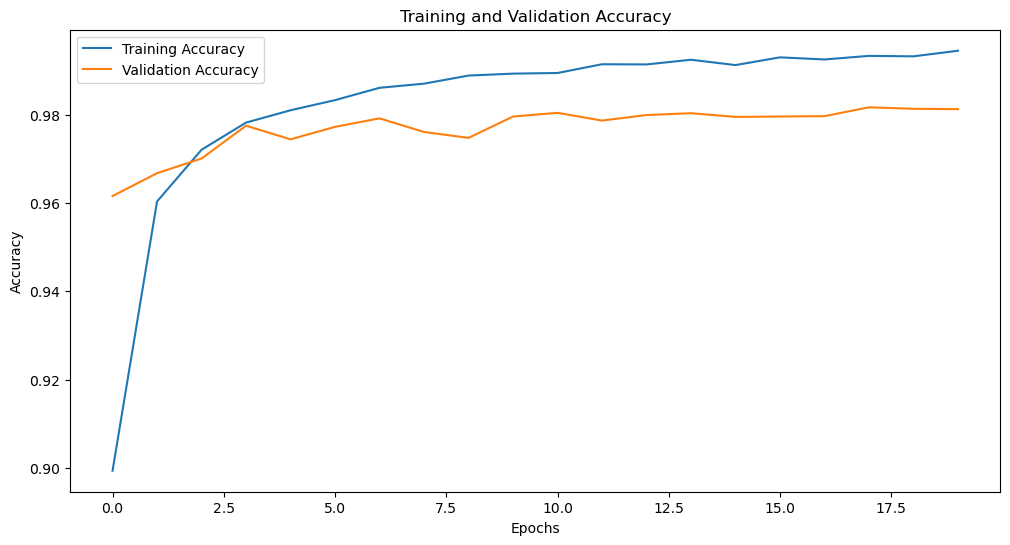

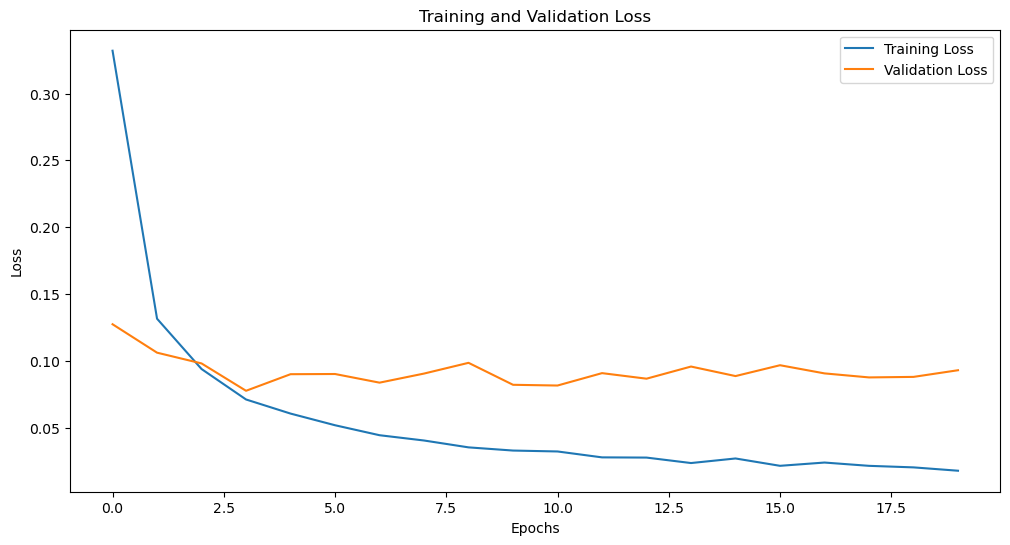

In [52]:
plot_model_diagram(model, history, x_test, y_test)

Test loss: 0.0825
Test accuracy: 0.9818
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


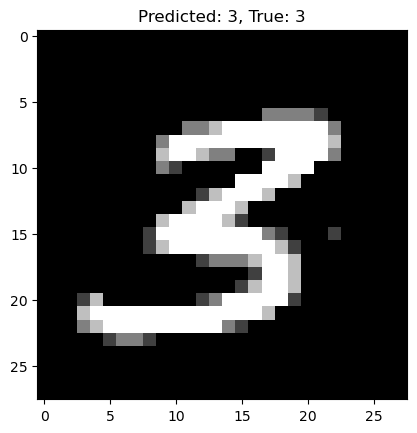

In [54]:
make_prediction(model, x_test, y_test)